Upload `kaggle.json` token to Colab first.  
Instructions are here https://www.kaggle.com/docs/api.

In [ ]:
# taken from here https://www.kaggle.com/discussions/general/51898

!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 71 Oct  7 18:52 kaggle.json
/content


In [ ]:
!mkdir datasets
!kaggle datasets download -d shravankumar9892/image-colorization -p datasets
!kaggle datasets download -d aayush9753/image-colorization-dataset -p datasets

mkdir: cannot create directory ‘datasets’: File exists
image-colorization.zip: Skipping, found more recently modified local copy (use --force to force download)
image-colorization-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
%cd datasets
!unzip image-colorization.zip
!unzip image-colorization-dataset.zip
%cd ..

/content/datasets
Archive:  image-colorization.zip
replace ab/ab/ab1.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ab/ab/ab2.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ab/ab/ab3.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace l/gray_scale.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  image-colorization-dataset.zip
replace data/test_black/image5000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: /content


In [ ]:
!pip install datasets


Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 15, in <module>
    from pip._vendor.packaging.requirements import Requirement
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/packaging/requirements.py", line 10, in <module>
    from pip._vendor.pyparsing import (  # noqa
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/py

In [ ]:
import numpy as np
import cv2

offset = 1000
l = np.load('datasets/l/gray_scale.npy')[..., None][:offset]

ab1 = np.load('datasets/ab/ab/ab1.npy')[:offset]
# ab2 = np.load('datasets/ab/ab/ab2.npy')
# ab3 = np.load('datasets/ab/ab/ab3.npy')
# ab = np.vstack((ab1, ab2, ab3))
colorized = np.concatenate((l, ab1), axis=-1)

c_images = []
for i in range(offset):
    lab_image = cv2.merge([l[i], ab1[i, ..., 0], ab1[i, ..., 1]])
    rgb_image = cv2.cvtColor(lab_image, cv2.COLOR_Lab2BGR)

    break
    c_images.append(rgb_image)

((1000, 224, 224, 1), (1000, 224, 224, 3))

In [ ]:
import cv2
from PIL import Image

c_images = []
bw_images = []
for i in range(offset):
    lab_image = cv2.merge([l[i], ab1[i, ..., 0], ab1[i, ..., 1]])
    rgb_image = cv2.cvtColor(lab_image, cv2.COLOR_Lab2RGB)
    pil_image = Image.fromarray(np.uint8(rgb_image))

    c_images.append(pil_image)
    bw_images.append(Image.fromarray(l[i].reshape((224, 224)).astype('uint8')*255))

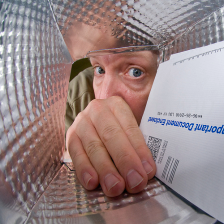

In [ ]:
c_images[4]

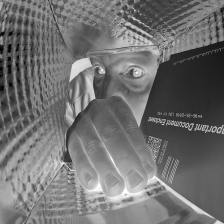

In [ ]:
bw_images[4]

In [ ]:
import datasets
import pandas as pd
import numpy as np

# Create dataset
df = datasets.Dataset.from_dict({"image": c_images, "conditioning_image": bw_images, "text": ["colorize image"] * len(l)})

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
df.push_to_hub("ummagumm-a/colorization_dataset2")

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]